## Google Drive Login



In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

# Imports

In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
url = "https://docs.google.com/spreadsheets/d/1_ao39hqitY_oj1l36kEjFFaMmfh0yddG2pY6Fsan2-E/edit?usp=sharing"
wb = gc.open_by_url(url)

## Experiments list

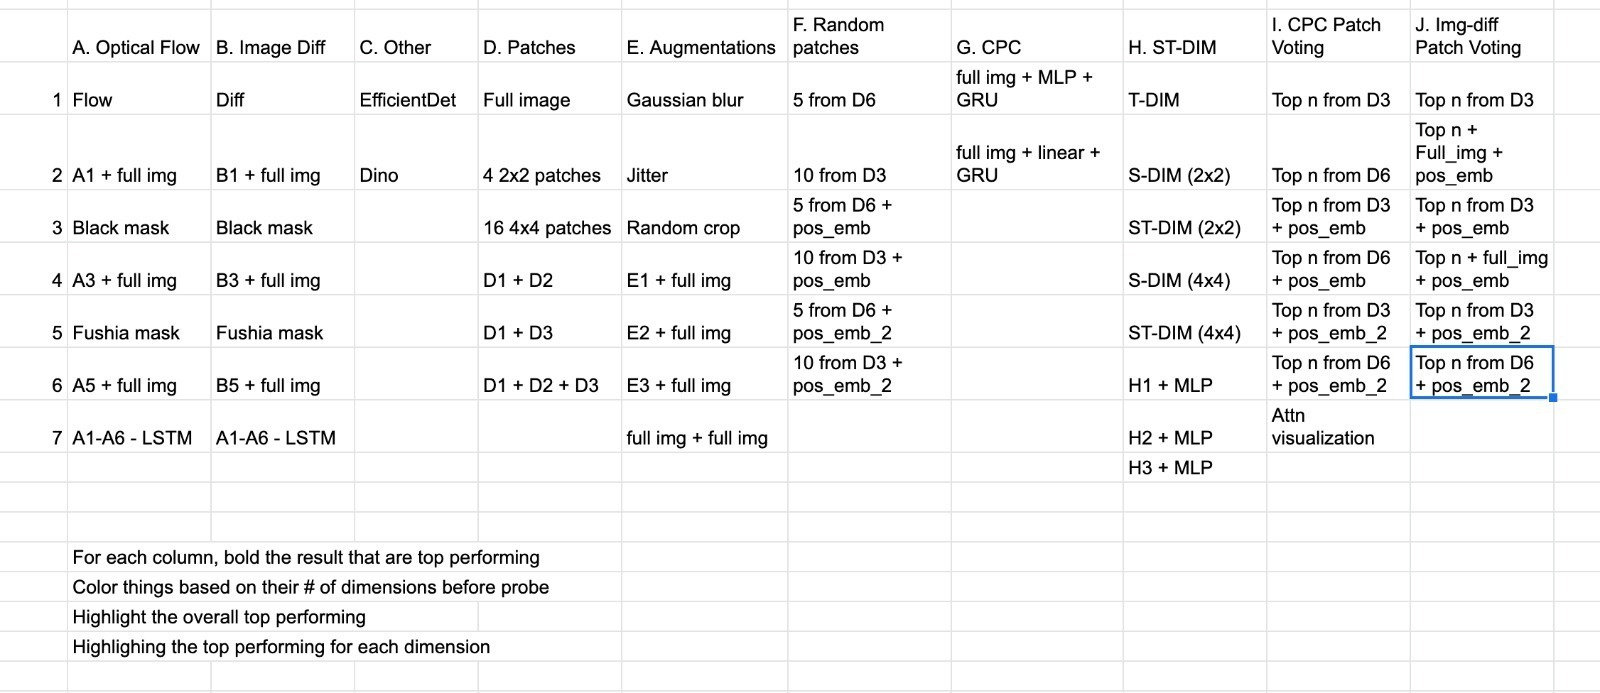

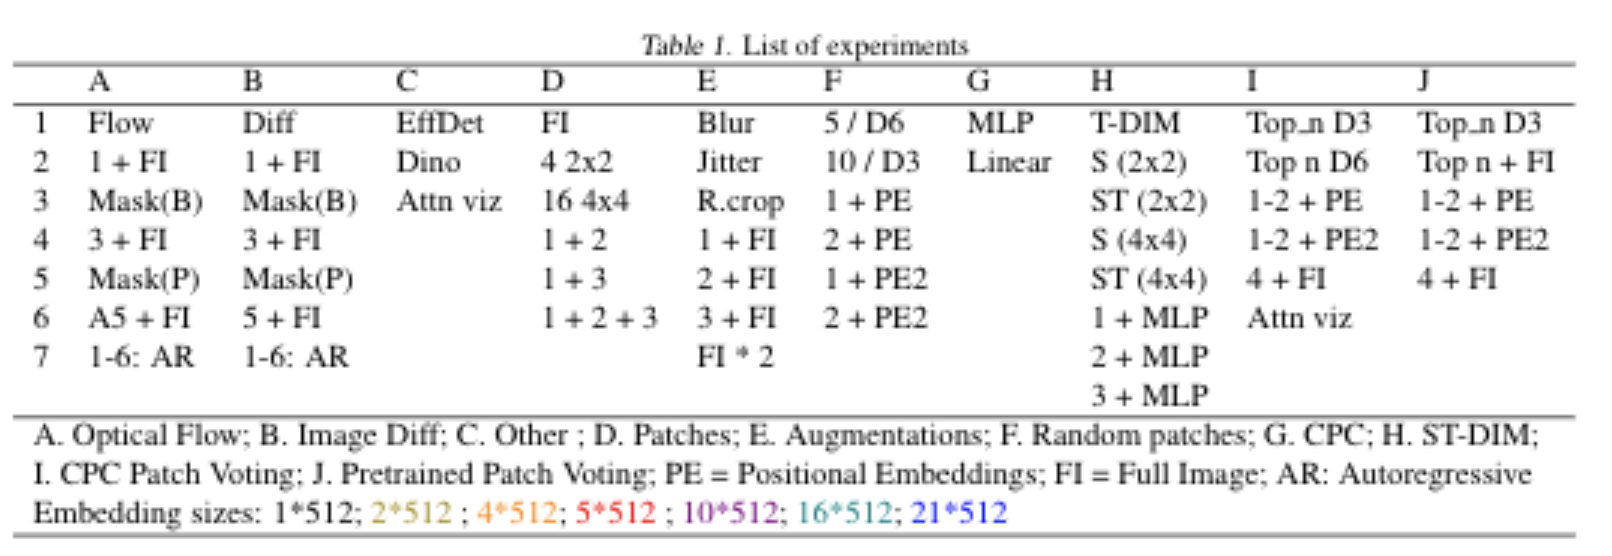

## Base code

In [4]:
save_img = False
base_name = "ATari-RL_Notebooks"
column_names = ["A_OpticalFlow", "B_ImageDiff", "C_EffDetDino", "D_Patches", 
                "E_Augmentations", "F_CPC", "G_ST-DIM", "H_CpcPatchAttention", 
                "I_PretrainedPatchAttention"]
game_names_full = ["Asteroids", "Berzerk", "Bowling", "Boxing", "Breakout", 
              "DemonAttack", "Freeway", "Frostbite", "Hero", "MontezumaE",
              "MsPacman", "Pitfall", "Pong", "PrivateEye", "Qbert", "Riverraid",
              "Seaquest", "SpaceInvaders", "Tennis", "Venture", "VideoPinball",
              "YarsRevenge"]
game_names_3 = ["Ast", "Ber", "Bow", "Box", "Bre", 
              "Dem", "Fre", "Fro", "Her", "Mon",
              "MsP", "Pit", "Pon", "Pri", "Qbe", "Riv",
              "Sea", "Spa", "Ten", "Ven", "Vid",
              "Yar"]
game_names = ["AS", "BZ", "BW", "BX", "BR", 
              "DA", "FW", "FB", "HE", "MR",
              "MP", "PF", "PG", "PE", "QB", "RR",
              "SQ", "SI", "TN", "VT", "VP",
              "YR"]
game_names = ["As", "Bz", "Bw", "Bx", "Br", 
              "Da", "Fw", "Fb", "He", "Mr",
              "Mp", "Pf", "Pg", "Pe", "Qb", "Rr",
              "Sq", "Si", "Tn", "Vt", "Vp",
              "Yr", "μ"]              
full_file_name_separator = " - "

def get_sheet_name(column_id):
  assert column_id < len(column_names) and column_id >= 0
  return column_names[column_id]

def get_file_name(column_id):
  assert column_id < len(column_names) and column_id >= 0
  return base_name + full_file_name_separator + column_names[column_id]

In [5]:
def plot_sheet(sheet_name, diff = False, anchor_name = None):
  flow_df = get_sheet_values(sheet_name)
  flow_df_num = clean_values(flow_df)
  if diff:
    flow_df_num = diff_values(flow_df_num, anchor_name)
  matplotlib.rc('figure', figsize=(10, 5))
  font = {'family' : 'monospace',
        'weight' : 'light',
        'size'   : '16'}
  plt.rc('font', **font) # using a named size
  plot_values(sheet_name, flow_df_num)

In [6]:
def multi_plot_sheet(sheet_names, diff = False, anchor_names = None):
  matplotlib.rc('figure', figsize=(23, 5), dpi=200)
  font = {'family' : 'monospace',
        'weight' : 'light',
        'size'   : '20'}
  plt.rc('font', **font) # using a named size
  flow_df_nums = []
  for index, sheet_name in enumerate(sheet_names):
    flow_df = get_sheet_values(sheet_name)
    flow_df_num = clean_values(flow_df)
    if diff:
      flow_df_num = diff_values(flow_df_num, anchor_names[index])
    flow_df_nums.append(flow_df_num)
  plot_multi_values(sheet_names, flow_df_nums)

In [7]:
def plot_multi_values(sheet_names, flow_df_nums):
  plt.figure()
  fig, axes = plt.subplots(1, len(flow_df_nums))
  for sheet_name, flow_df_num, ax in zip(sheet_names, flow_df_nums,axes):
    flow_df_num=flow_df_num.astype(float)
    ax.plot(flow_df_num, marker='o', linestyle=':', 
                    markersize=5)
    ax.legend(labels = flow_df_num.columns, 
              ncol = len(flow_df_num.columns),
              fancybox = False, 
              borderpad = 0.02,
              handletextpad = 0.0,
              columnspacing = 0.08,
              loc = 'upper left',
              handlelength = 1.2,
              bbox_to_anchor=(-0.1,1.13),
              frameon=False,
              fontsize = 'large'
              ) 
    ax.set_title(sheet_name)
    ttl = ax.title
    ttl.set_position([.5, 1.1])
    ttl.set_weight('bold')
    tickvalues = range(1,len(game_names)+1)
    plt.sca(ax)
    legend_font = {
        'weight' : 'ultralight'}
    plt.xticks(ticks = tickvalues , labels = game_names, rotation=0, 
               **legend_font)
    plt.yticks(rotation=0)
    plt.subplots_adjust(wspace = 0.1)
  if save_img:
    plt.savefig(save_path)
    
  plt.show()

In [8]:
def get_sheet_values(sheet_name):
  flow_sheet = wb.worksheet(sheet_name)
  flow_data = flow_sheet.get_all_values()
  flow_df = pd.DataFrame(flow_data)
  return flow_df

In [9]:
def clean_values(flow_df):
  flow_df.columns = flow_df.iloc[0]
  plot_y_label = flow_df.columns[1:]
  plot_x_label = flow_df["Env Name"]
  flow_df_num = flow_df.drop(axis = 0, columns=["Env Name"])
  flow_df_num = flow_df_num.drop(0)
  flow_df_num.fillna(0, inplace=True)
  flow_df_num = flow_df_num.replace(r'^\s*$', np.nan, regex=True)
  return flow_df_num

In [10]:
def diff_values(flow_df, anchor_name):
  flow_df=flow_df.astype(float)
  diff_df = flow_df.copy(deep=True)
  anchor = flow_df[anchor_name]
  for column in flow_df.columns:
    diff_df[column] = flow_df[column] - anchor
  return diff_df

In [11]:
def plot_values(sheet_name, flow_df_num):
  plt.figure()
  flow_df_num=flow_df_num.astype(float)
  flow_df_num.plot(marker='o', linestyle=':', 
                   markersize=5, 
                   figsize=(10, 6)).legend(loc='lower center',bbox_to_anchor=(1.10, 0.5))
  tickvalues = range(1,len(game_names)+1)
  plt.xticks(ticks = tickvalues , labels = game_names, rotation=0)
  plt.title(sheet_name)
  if save_img:
    plt.savefig(save_path)
    
  plt.show()

In [12]:
def plot_diff_sheet(sheet_name, anchor_name):
  plot_sheet(sheet_name, diff = True, anchor_name = anchor_name)

# Paper

<Figure size 4600x1000 with 0 Axes>

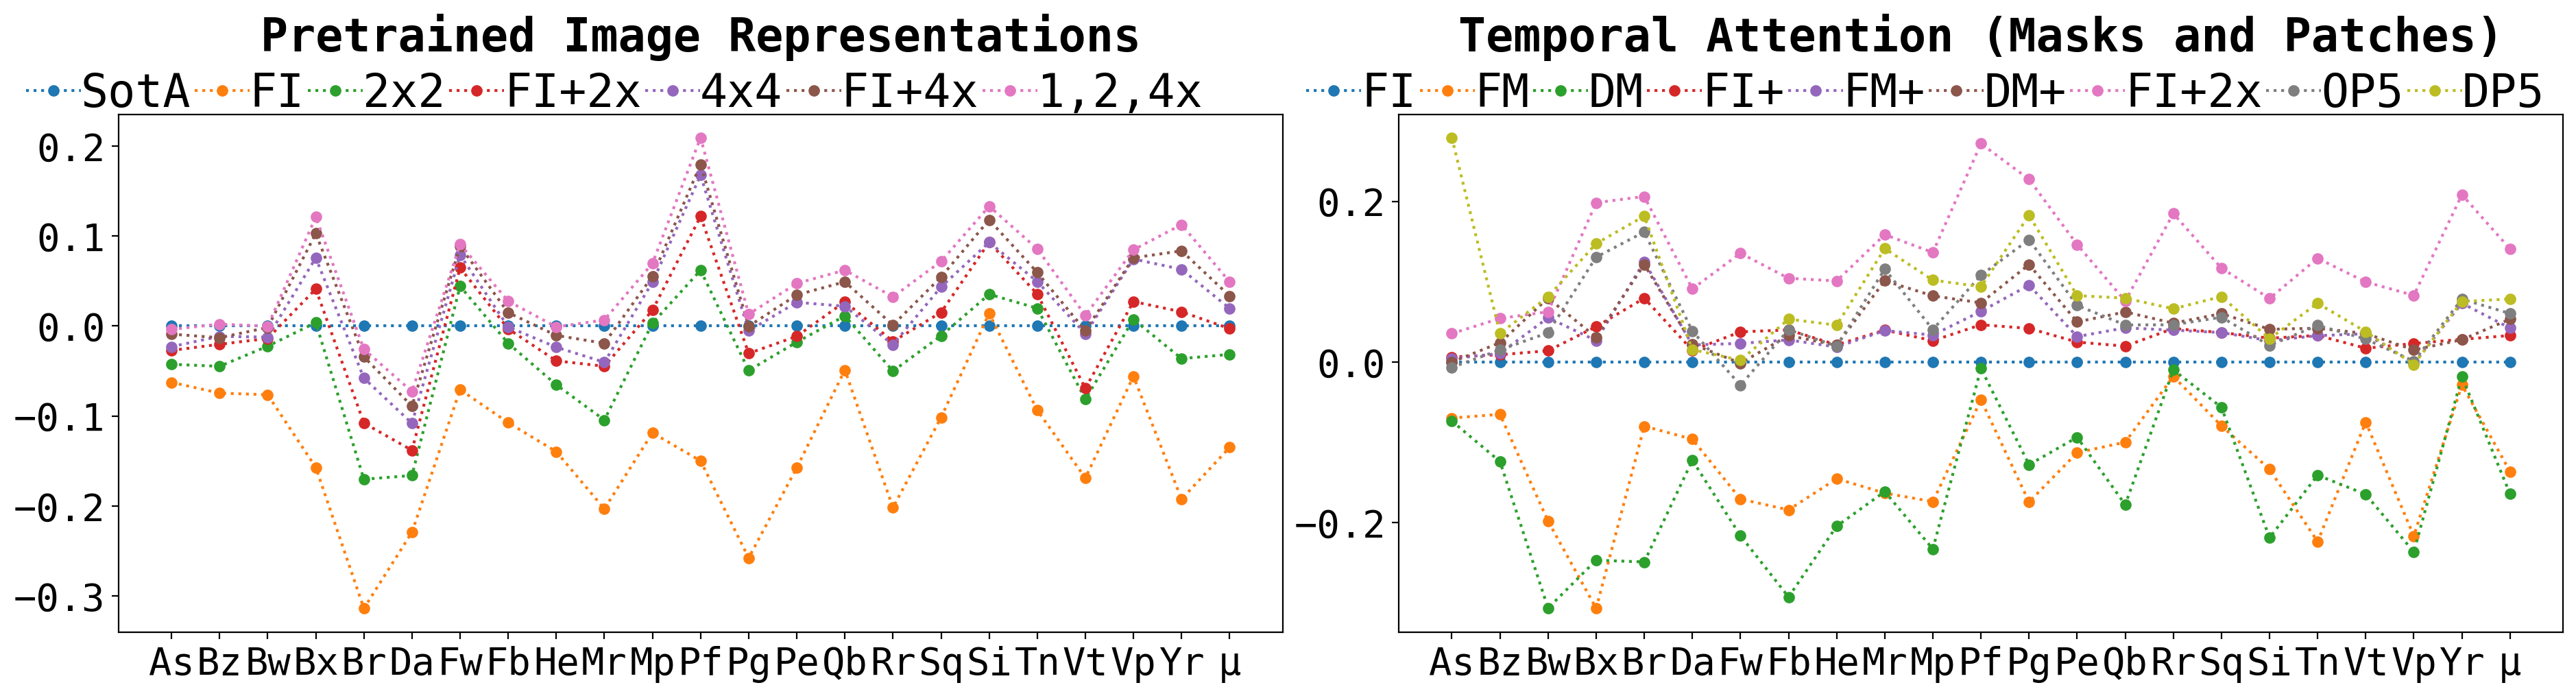

In [13]:
multi_plot_sheet(["Pretrained Image Representations", "Temporal Attention (Masks and Patches)"], diff=True, anchor_names=["SotA","FI"])

<Figure size 4600x1000 with 0 Axes>

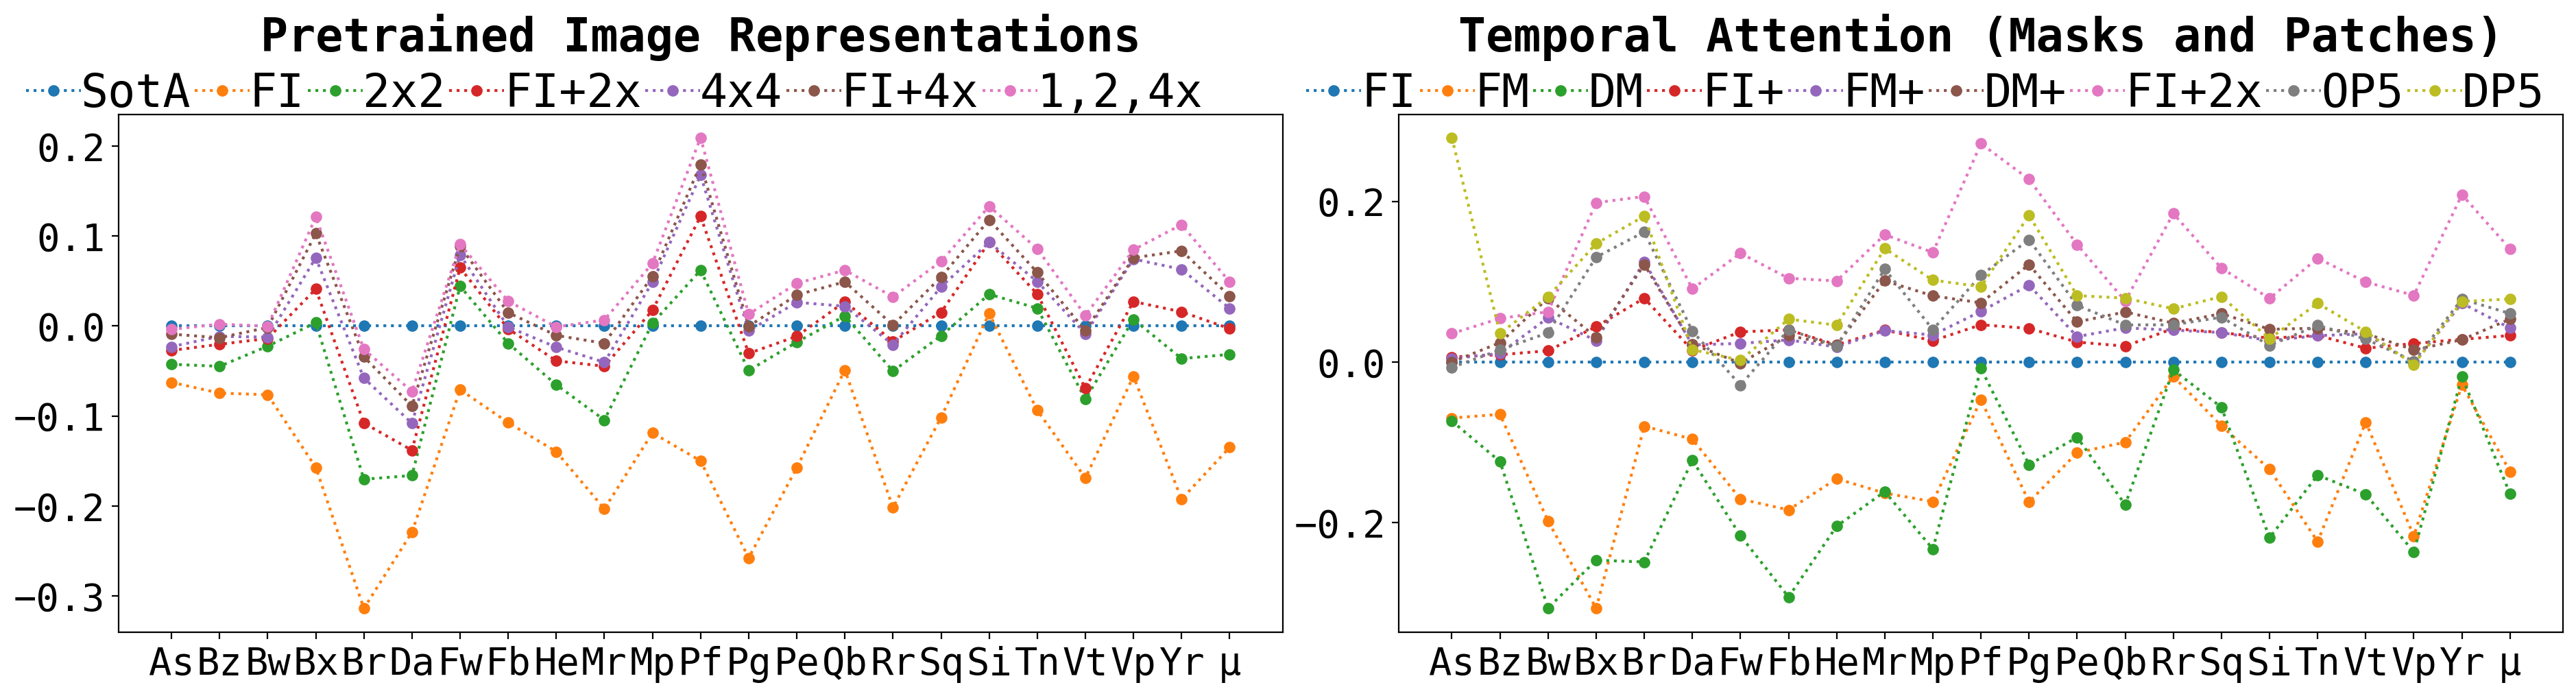

In [14]:
multi_plot_sheet(["Pretrained Image Representations", "Temporal Attention (Masks and Patches)"], diff=True, anchor_names=["SotA","FI"])

<Figure size 4600x1000 with 0 Axes>

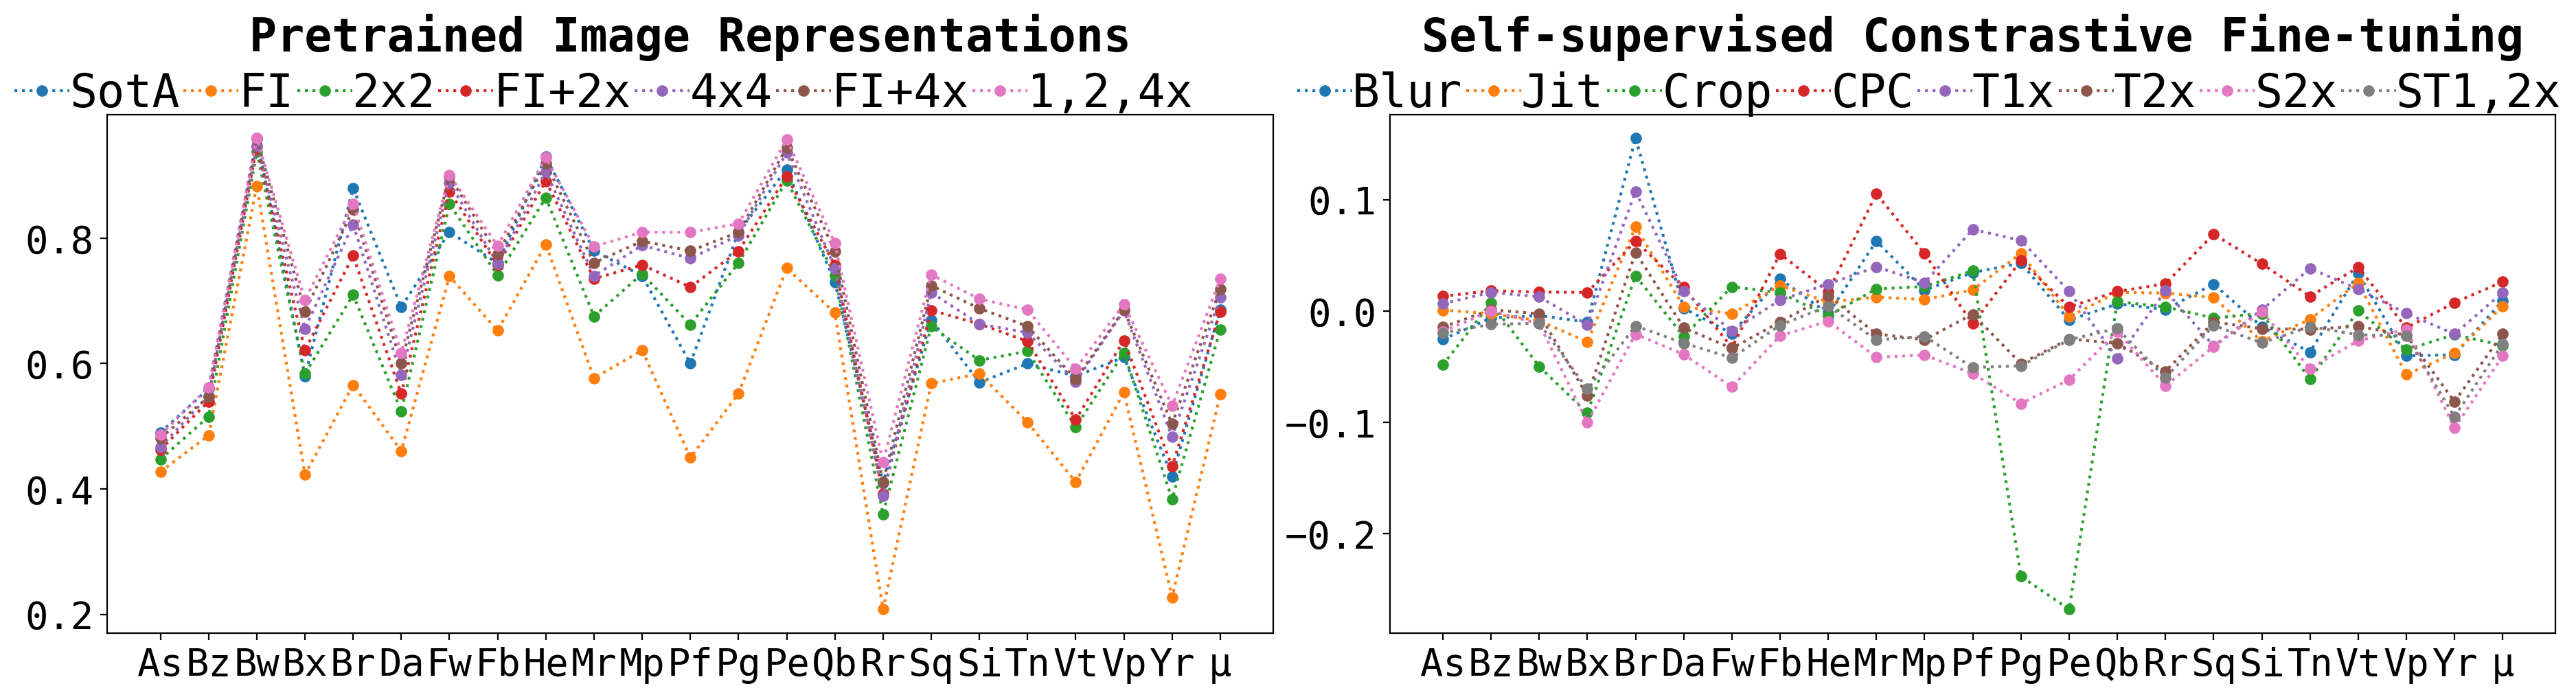

In [15]:
multi_plot_sheet(["Pretrained Image Representations", "Self-supervised Constrastive Fine-tuning"])